<a href="https://colab.research.google.com/github/sivakrishna648/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [ ]:
# 2. Load Dataset
df = pd.read_csv('/content/customer_data_advanced.csv')

In [ ]:
# 3. Encode Categorical Features
label_encoders = {}
categorical_cols = ['Gender', 'Profession', 'City', 'Marital Status', 'Owns a Car']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# 4. Select Features for Clustering
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)',
            'Profession', 'City', 'Marital Status', 'Number of Children', 'Owns a Car']

X = df[features]


In [ ]:
# 5. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 6. Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# 7. Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)

In [ ]:
# 8. Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
# 9. Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)


In [ ]:
# 10. Evaluate with Silhouette Score
print("Silhouette Scores:")
print(f"KMeans: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"Agglomerative: {silhouette_score(X_scaled, agglo_labels):.3f}")
print(f"GMM: {silhouette_score(X_scaled, gmm_labels):.3f}")


Silhouette Scores:
KMeans: 0.091
Agglomerative: 0.069
GMM: 0.078


In [ ]:
# 11. Dimensionality Reduction for Visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

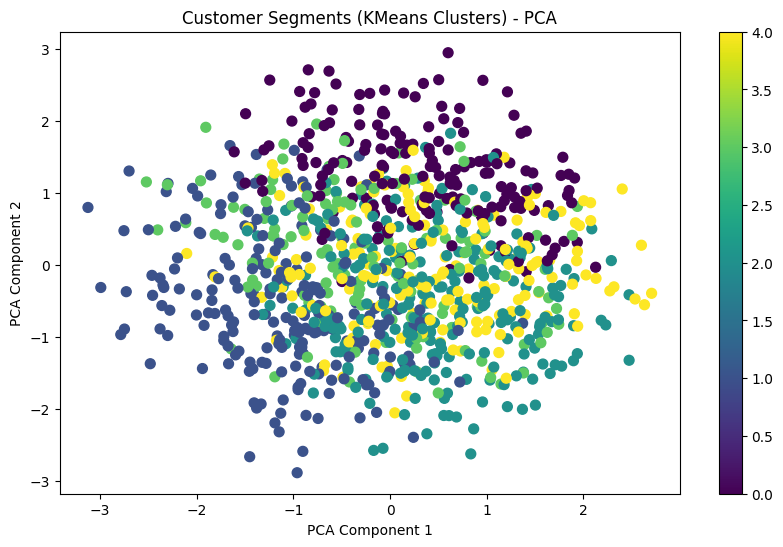

In [ ]:
# 12. Plot Clusters (KMeans Example with PCA)
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('Customer Segments (KMeans Clusters) - PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
# 13. Dimensionality Reduction for Visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


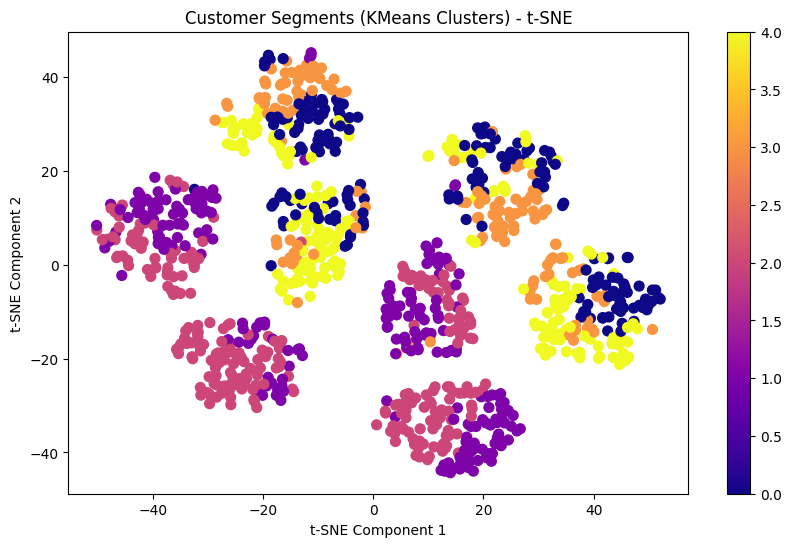

In [ ]:
# 14. Plot Clusters (KMeans Example with t-SNE)
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans_labels, cmap='plasma', s=50)
plt.title('Customer Segments (KMeans Clusters) - t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

In [ ]:
# 15. Save Cluster Labels to DataFrame
df['Cluster_KMeans'] = kmeans_labels
df['Cluster_Agglo'] = agglo_labels
df['Cluster_GMM'] = gmm_labels

In [ ]:
# 16. Save to CSV
df.to_csv('/content/customer_data_advanced.csv', index=False)

In [ ]:
# 17. Profile the KMeans Clusters
cluster_profiles = df.groupby('Cluster_KMeans')[features].mean()
print("\nCluster Profiles:")
print(cluster_profiles)


Cluster Profiles:
                      Age    Gender  Annual Income (k$)  \
Cluster_KMeans                                            
0               46.031915  0.005319           83.510638   
1               47.677273  0.972727          104.104545   
2               40.736434  0.996124          121.089147   
3               41.433566  0.020979          128.727273   
4               43.952880  0.000000          129.209424   

                Spending Score (1-100)  Profession      City  Marital Status  \
Cluster_KMeans                                                                 
0                            50.031915    3.606383  2.973404        0.558511   
1                            55.700000    5.463636  4.159091        0.604545   
2                            45.782946    1.837209  2.937984        0.383721   
3                            58.447552    3.342657  1.307692        0.671329   
4                            43.968586    3.219895  5.685864        0.314136   

      

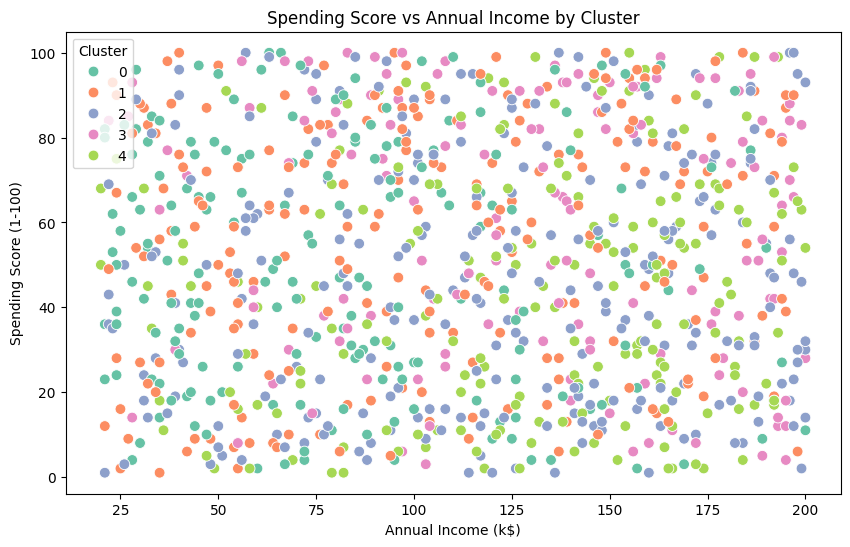

In [ ]:
# 18. Visualize Spending Score vs Income by Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', palette='Set2', s=60)
plt.title('Spending Score vs Annual Income by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

<ipython-input-35-127229b587ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_KMeans', y='Age', palette='pastel')


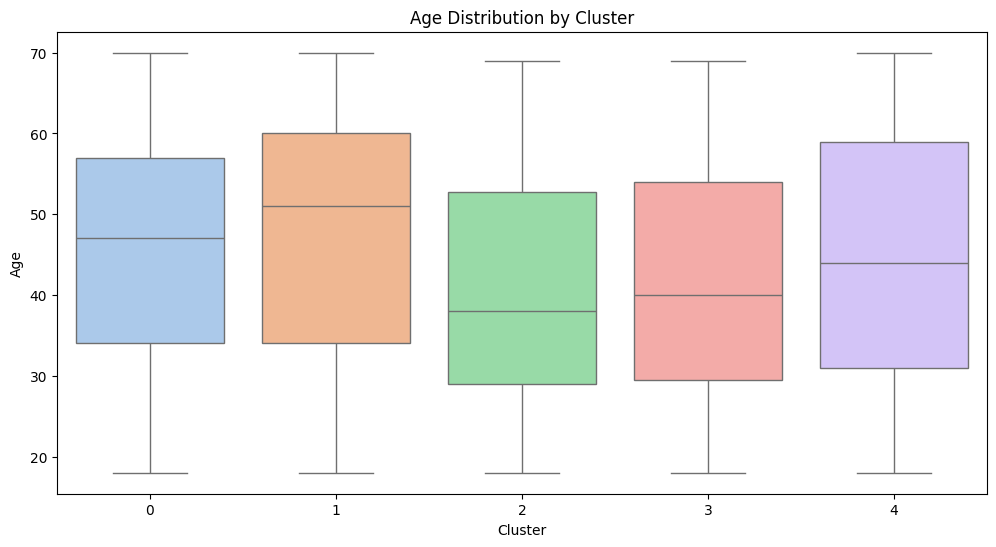

In [ ]:
# 19. Plot Age Distribution by Cluster
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Cluster_KMeans', y='Age', palette='pastel')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

In [ ]:
# 20. Save Cluster Profiles to CSV
cluster_profiles.to_csv('/content/customer_data_advanced.csv')